# SPEECH EMOTION RECOGNITION

In [3]:
pip install librosa soundfile numpy sklearn


  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (689 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached audioread-2.1.9-py3-none-any.whl
  Using cached resampy-0.2.2-py3-none-any.whl
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached pooch-1.4.0-py3-none-any.whl (51 kB)
  Using cached numba-0.53.1-cp38-cp38-win_amd64.whl (2.3 MB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge speechrecognition


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DIVYA\Anaconda3\envs\tensorflow


  added / updated specs:
    - speechrecognition


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




    ca-certificates-2021.5.30  |       h5b45459_0         171 KB  conda-forge
    certifi-2021.5.30          |   py38haa244fe_0         142 KB  conda-forge
    openssl-1.1.1k             |       h8ffe710_0         5.7 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    speechrecognition-3.7.1    |   py38haa244fe_3        31.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        37.9 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  speechrecognition  conda-forge/win-64::speechrecognition-3.7.1-py38haa244fe_3

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2021.5.25-~ --> conda-forge::ca-certificates-2021.5.30-h5b45459_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main::certifi-2021.5.30-py38haa9~

speechrecognition-3. | 31.8 MB   | ####3      |  44% 
speechrecognition-3. | 31.8 MB   | ####4      |  44% 
speechrecognition-3. | 31.8 MB   | ####4      |  44% 
speechrecognition-3. | 31.8 MB   | ####4      |  45% 
speechrecognition-3. | 31.8 MB   | ####5      |  45% 
speechrecognition-3. | 31.8 MB   | ####5      |  45% 
speechrecognition-3. | 31.8 MB   | ####5      |  46% 
speechrecognition-3. | 31.8 MB   | ####5      |  46% 
speechrecognition-3. | 31.8 MB   | ####6      |  46% 
speechrecognition-3. | 31.8 MB   | ####6      |  46% 
speechrecognition-3. | 31.8 MB   | ####6      |  47% 
speechrecognition-3. | 31.8 MB   | ####6      |  47% 
speechrecognition-3. | 31.8 MB   | ####7      |  47% 
speechrecognition-3. | 31.8 MB   | ####7      |  48% 
speechrecognition-3. | 31.8 MB   | ####7      |  48% 
speechrecognition-3. | 31.8 MB   | ####8      |  48% 
speechrecognition-3. | 31.8 MB   | ####8      |  48% 
speechrecognition-3. | 31.8 MB   | ####8      |  48% 
speechrecognition-3. | 31.8 

In [5]:
import glob
import os
import librosa
import time
import numpy as np
import pandas as pd

### loading audio

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [1]:
import librosa
%matplotlib inline

import matplotlib.pyplot as plt
import librosa.display

audio_data = "C:\\Users\\DIVYA\\Downloads\\RAVDESS\\Actor_01\\03-01-04-02-02-02-01.wav"

x,sr = librosa.load(audio_data)
print(type(x), type(sr))


<class 'numpy.ndarray'> <class 'int'>


In [23]:
print(sr,x)

22050 [0. 0. 0. ... 0. 0. 0.]


In [7]:
import IPython.display as ipd
ipd.Audio(audio_data)

In [5]:
print(type(x)) # convert into 1 dim signal-mono

<class 'numpy.ndarray'>


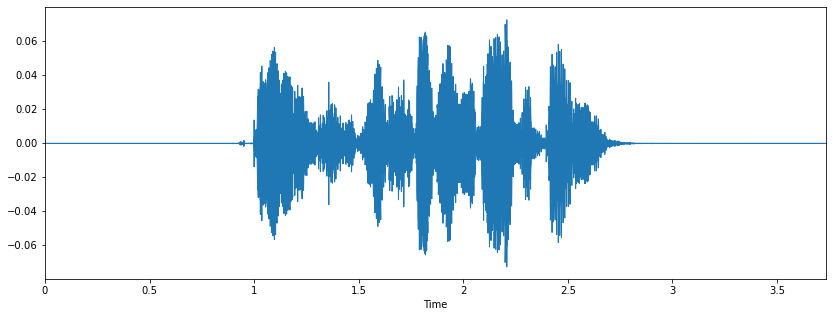

In [6]:
# plot the audio array using librosa.display.waveplot:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### trying scipy.io

In [7]:
from scipy.io import wavfile as wav
samplerate,audio=wav.read(audio_data)
print(samplerate)

16000


In [8]:
print(type(audio))

<class 'numpy.ndarray'>


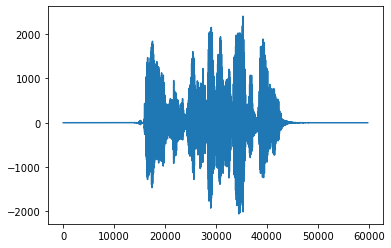

In [9]:
plt.plot(audio)

In [ ]:
import speech_recognition as sr

## displaying spectogram

In [25]:
audio2 = "C:\\Users\\DIVYA\\Downloads\\RAVDESS\Actor_01\\03-01-03-02-02-01-01.wav"
audio3 = "C:\\Users\\DIVYA\\Downloads\\RAVDESS\\Actor_01\\03-01-05-02-02-01-01.wav"



x2,sr2 = librosa.load(audio2)
x3,sr3 = librosa.load(audio3)

In [26]:
ipd.Audio(audio2)

In [12]:
ipd.Audio(audio3)

In [13]:
# spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal 
#over time at various frequencies present in a particular waveform

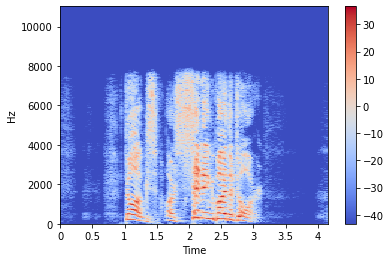

In [14]:
X = librosa.stft(x3)     # Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr3, x_axis='time', y_axis='hz')
plt.colorbar()

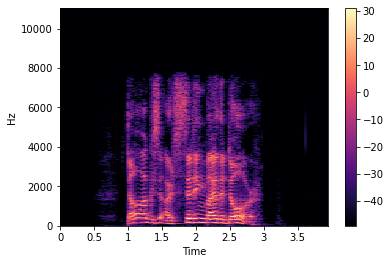

In [15]:
X = librosa.stft(x2)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr2, x_axis='time', y_axis='hz')
plt.colorbar()

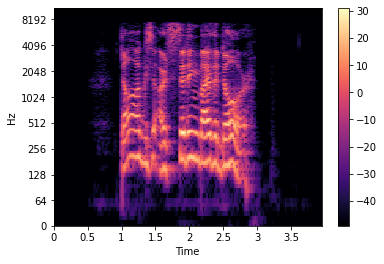

In [16]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# FEATURE EXTRACTION
## Dependent features(class labels) and independent features need to be extracted

#### extracting MFCC from the audio samples  -- to analyze the frquency and tie characteristics of sound

In [17]:
mfccs=librosa.feature.mfcc(y=x2,sr=sr,n_mfcc=40)
print(mfccs.shape)

(40, 170)


In [18]:
 mfccs

array([[-707.31744, -707.31744, -707.31744, ..., -707.31744, -707.31744,
        -707.31744],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

In [19]:
x= np.mean(librosa.feature.mfcc(y=x2, sr=sr, n_mfcc=40).T, axis=0)
x.shape

(40,)

In [20]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

###### Selecting the emotions to be classified. Note that the emotions 'neutral', 'calm' and 'surprised' are only found in RAVDESS dataset and 'pleasantly surprised' or 'ps' is only available in TESS dataset. 
#### To combine all the emotions from both datasets into 8 emotion classes, we have changed 'pleasantly surprised' to 'surprised' and 'fearful' to 'fear'

In [20]:
#defined TESS emotions to test on TESS dataset only
tess_emotions=['angry','disgust','fear','ps','happy','sad']

##defined RAVDESS emotions to test on RAVDESS dataset only
ravdess_emotions=['neutral','calm','angry', 'happy','disgust','sad','fear','surprised']


#final emotions to observe
observed_emotions = ['sad','angry','happy','disgust','surprised','neutral','calm','fear']

In [21]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    result=np.array([])
    
    if chroma:
        stft=np.abs(librosa.stft(X))
   
    
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    #print(result)
    return result

### Choosing a dataset

In [22]:
def dataset_options():
    # choosing datasets
    ravdess = True
    tess = True
    ravdess_speech = False
    ravdess_song = False
    data = {'ravdess':ravdess, 'ravdess_speech':ravdess_speech, 'ravdess_song':ravdess_song, 'tess':tess}
    print("DATASETS USED ARE :",data)
    return data

### Speech to text

In [ ]:
import speech_recognition as srn
r=srn.Recognizer()
for file in glob.glob("C:\\Users\\DIVYA\\Downloads\\RAVDESS\\Actor_01\\*.wav"):
    with srn.AudioFile(file) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

### LOAD DATA:   Extract features from each file  in chosen datasets using the extract_feature() function defined.

In [23]:
def load_data(): 
    x,y=[],[]
    c,c1=0,0   
    # feature to extract
    mfcc = True
    chroma=True
    mel=True
    
    data = dataset_options()
    #paths = []
    if data['ravdess']:
        for file in glob.glob("C:\\Users\\DIVYA\\Downloads\\RAVDESS\\Actor_*\\*.wav"):
            file_name=os.path.basename(file)
            emotion=emotions[file_name.split("-")[2]] #to get emotion from emotions dictionary using key
            
            if emotion not in observed_emotions:
                continue
            feature=extract_feature(file, mfcc,chroma,mel)
            c=c+1
            x.append(feature)
            y.append(emotion)
           
    if data['tess']:
        for file in glob.glob("C:\\Users\\DIVYA\\Downloads\\TESS\\*AF_*\\*.wav"):
            file_name=os.path.basename(file)
            emotion=file_name.split("_")[2][:-4] #split and remove .wav
            

            if emotion == 'ps':
                emotion = 'surprised'
            if emotion not in observed_emotions:
                continue

            feature=extract_feature(file, mfcc,chroma,mel)
            c1=c1+1
            #print(feature)
            x.append(feature)
            y.append(emotion)
   
    print("total files in ravdess dataset:",c)
    print("total files in tess dataset:",c1) 
    return {"X":x,"y":y}

In [24]:
st= time.time()
Trial_dict = load_data()

print(" DATA LOADED SUCCESSFULLY . Loading time: %s seconds ---" % (time.time() - st))


DATASETS USED ARE : {'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': True}
total files in ravdess dataset: 1440
total files in tess dataset: 2800
 DATA LOADED SUCCESSFULLY . Loading time: 316.63150906562805 seconds ---


In [25]:
X = pd.DataFrame(Trial_dict["X"])
y = pd.DataFrame(Trial_dict["y"])
print(X.shape,y.shape)

(4240, 180) (4240, 1)


In [26]:
data = pd.concat([X, y], axis =1)
data.head()

0          1          2          3         4         5         6    \
0 -707.226318  68.469788 -11.611320  22.716902 -0.303072  5.822211 -6.081500   
1 -703.383240  70.197769 -15.213277  27.412649 -0.247905  5.837488 -4.831208   
2 -700.794006  70.959595 -11.694939  23.595743 -2.463483  6.388802 -5.021149   
3 -694.826050  69.669205  -9.815083  23.888597 -1.381263  8.620013 -4.805181   
4 -737.437988  77.273209 -11.190391  26.755884 -1.537418  8.085284 -7.015995   

        7          8         9    ...           171           172  \
0 -2.655389  -9.960321 -5.103168  ...  7.123859e-13  4.828430e-13   
1 -4.569034 -10.607910 -3.820005  ...  8.663430e-13  5.532387e-13   
2 -4.631995  -9.482592 -5.633955  ...  1.411940e-12  1.064589e-12   
3 -6.055672  -9.544140 -5.380029  ...  1.590781e-12  1.339222e-12   
4 -3.006230  -8.947398 -7.313802  ...  3.630840e-13  2.121317e-13   

            173           174           175           176           177  \
0  8.118721e-13  1.687647e-12  3.500356e-12  1.881162e-12  3.081991e-12   
1  1.016019e-12  1.739981e-12  4.027293e-12  2.397221e-12  4.418747e-12   
2  2.310054e-12  3.802464e-12  5.353037e-12  3.087828e-12  5.164499e-12   
3  2.484888e-12  3.250877e-12  3.961606e-12  2.927518e-12  4.272339e-12   
4  3.764892e-13  5.853325e-13  2.479844e-12  1.447206e-12  2.363926e-12   

            178           179      0    
0  2.206314e-12  6.977832e-13  neutral  
1  2.542645e-12  7.244875e-13  neutral  
2  3.851312e-12  2.595323e-12  neutral  
3  3.753536e-12  2.238689e-12  neutral  
4  1.182290e-12  4.276118e-13     calm  

[5 rows x 181 columns]

In [27]:
y

0
0     neutral
1     neutral
2     neutral
3     neutral
4        calm
...       ...
4235      sad
4236      sad
4237      sad
4238      sad
4239      sad

[4240 rows x 1 columns]

In [28]:
y=y.rename(columns={0:'Emotion'})

In [29]:
data = pd.concat([X, y], axis =1)
data.head()

0          1          2          3         4         5         6  \
0 -707.226318  68.469788 -11.611320  22.716902 -0.303072  5.822211 -6.081500   
1 -703.383240  70.197769 -15.213277  27.412649 -0.247905  5.837488 -4.831208   
2 -700.794006  70.959595 -11.694939  23.595743 -2.463483  6.388802 -5.021149   
3 -694.826050  69.669205  -9.815083  23.888597 -1.381263  8.620013 -4.805181   
4 -737.437988  77.273209 -11.190391  26.755884 -1.537418  8.085284 -7.015995   

          7          8         9  ...           171           172  \
0 -2.655389  -9.960321 -5.103168  ...  7.123859e-13  4.828430e-13   
1 -4.569034 -10.607910 -3.820005  ...  8.663430e-13  5.532387e-13   
2 -4.631995  -9.482592 -5.633955  ...  1.411940e-12  1.064589e-12   
3 -6.055672  -9.544140 -5.380029  ...  1.590781e-12  1.339222e-12   
4 -3.006230  -8.947398 -7.313802  ...  3.630840e-13  2.121317e-13   

            173           174           175           176           177  \
0  8.118721e-13  1.687647e-12  3.500356e-12  1.881162e-12  3.081991e-12   
1  1.016019e-12  1.739981e-12  4.027293e-12  2.397221e-12  4.418747e-12   
2  2.310054e-12  3.802464e-12  5.353037e-12  3.087828e-12  5.164499e-12   
3  2.484888e-12  3.250877e-12  3.961606e-12  2.927518e-12  4.272339e-12   
4  3.764892e-13  5.853325e-13  2.479844e-12  1.447206e-12  2.363926e-12   

            178           179  Emotion  
0  2.206314e-12  6.977832e-13  neutral  
1  2.542645e-12  7.244875e-13  neutral  
2  3.851312e-12  2.595323e-12  neutral  
3  3.753536e-12  2.238689e-12  neutral  
4  1.182290e-12  4.276118e-13     calm  

[5 rows x 181 columns]

### Storing these data dataframe in an excel sheet to avoid loading again and again

In [30]:
data = data.reindex(np.random.permutation(data.index))
data.to_csv("RAVDESS,TESS---new.csv")

## DATA PREPROCESSING  
#### Converting last column to numerical

In [6]:
dataframe=pd.read_csv("C:\\Users\\DIVYA\\Documents\\MACHINELEARNINGWORKSHOPFILES\\RAVDESS,TESS---new.csv")

In [7]:
from sklearn.preprocessing import LabelEncoder
dataframe['Emotion']=LabelEncoder().fit_transform(dataframe['Emotion'])

In [8]:
dataframe.head()

Unnamed: 0           0          1          2          3          4  \
0        2958 -332.800934  26.550747 -16.730242  10.314151 -20.764639   
1        3312 -302.037537  46.593193  -5.462951  47.262825  -5.508809   
2        2796 -505.748718  75.767426  17.879669  16.022383  -0.379723   
3        1718 -455.742859  86.338509  11.563093   7.967886   4.676503   
4         986 -542.231323  70.619858 -26.044020  23.034037  -0.302604   

           5          6          7          8  ...           171  \
0   8.125613  -5.450981  -4.851918 -11.795403  ...  2.450166e-02   
1   0.732280 -10.130578   1.045017 -21.198420  ...  1.309203e-02   
2  17.856373 -15.947631 -10.802357 -19.255499  ...  5.753120e-05   
3  11.751726 -18.530741   8.897447 -22.486078  ...  7.088984e-04   
4   9.471252  -1.802500 -11.864940  -9.779796  ...  2.112992e-11   

            172           173           174           175           176  \
0  1.712081e-02  9.413755e-03  4.647407e-03  1.226276e-03  4.838317e-04   
1  1.587725e-02  1.485246e-02  4.828230e-03  7.262604e-04  4.253183e-04   
2  2.507629e-05  2.235858e-05  1.264298e-05  4.528304e-06  2.602932e-06   
3  4.602998e-04  2.819661e-04  1.436290e-04  5.523927e-05  1.393584e-05   
4  1.549380e-11  3.035954e-11  4.196216e-11  3.007180e-11  1.950359e-11   

            177           178           179  Emotion  
0  1.505855e-04  4.917445e-05  5.409286e-06        0  
1  1.183912e-04  3.179050e-05  4.860554e-06        3  
2  7.662960e-07  1.059128e-07  1.049518e-08        6  
3  4.358115e-06  6.039492e-07  6.906097e-08        2  
4  3.161244e-11  2.658030e-11  2.250094e-11        6  

[5 rows x 182 columns]

In [9]:
dataframe=dataframe.iloc[:,1:]
dataframe.head()

0          1          2          3          4          5  \
0 -332.800934  26.550747 -16.730242  10.314151 -20.764639   8.125613   
1 -302.037537  46.593193  -5.462951  47.262825  -5.508809   0.732280   
2 -505.748718  75.767426  17.879669  16.022383  -0.379723  17.856373   
3 -455.742859  86.338509  11.563093   7.967886   4.676503  11.751726   
4 -542.231323  70.619858 -26.044020  23.034037  -0.302604   9.471252   

           6          7          8         9  ...           171           172  \
0  -5.450981  -4.851918 -11.795403  7.012001  ...  2.450166e-02  1.712081e-02   
1 -10.130578   1.045017 -21.198420  7.217968  ...  1.309203e-02  1.587725e-02   
2 -15.947631 -10.802357 -19.255499  8.047578  ...  5.753120e-05  2.507629e-05   
3 -18.530741   8.897447 -22.486078  0.983861  ...  7.088984e-04  4.602998e-04   
4  -1.802500 -11.864940  -9.779796  4.258080  ...  2.112992e-11  1.549380e-11   

            173           174           175           176           177  \
0  9.413755e-03  4.647407e-03  1.226276e-03  4.838317e-04  1.505855e-04   
1  1.485246e-02  4.828230e-03  7.262604e-04  4.253183e-04  1.183912e-04   
2  2.235858e-05  1.264298e-05  4.528304e-06  2.602932e-06  7.662960e-07   
3  2.819661e-04  1.436290e-04  5.523927e-05  1.393584e-05  4.358115e-06   
4  3.035954e-11  4.196216e-11  3.007180e-11  1.950359e-11  3.161244e-11   

            178           179  Emotion  
0  4.917445e-05  5.409286e-06        0  
1  3.179050e-05  4.860554e-06        3  
2  1.059128e-07  1.049518e-08        6  
3  6.039492e-07  6.906097e-08        2  
4  2.658030e-11  2.250094e-11        6  

[5 rows x 181 columns]

### SPLITTING THE DATA

In [10]:
y=dataframe[["Emotion"]]
x=dataframe.drop("Emotion",axis=1)
print(x.shape)

(4240, 180)


In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=4)


In [12]:
print(xtrain.shape,xtest.shape)

(2968, 180) (1272, 180)


In [13]:
print(ytest.shape,ytrain.shape)

(1272, 1) (2968, 1)


## DECISION TREE CLASSIFIER

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [15]:
predictions = dtree.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       174
           1       0.42      0.45      0.44        53
           2       0.80      0.69      0.74       196
           3       0.77      0.71      0.74       187
           4       0.58      0.65      0.61       170
           5       0.82      0.79      0.80       142
           6       0.78      0.73      0.75       179
           7       0.63      0.70      0.66       171

    accuracy                           0.71      1272
   macro avg       0.69      0.69      0.69      1272
weighted avg       0.72      0.71      0.71      1272



In [16]:
dtree.score(xtest,ytest)*100

70.9119496855346

<AxesSubplot:>

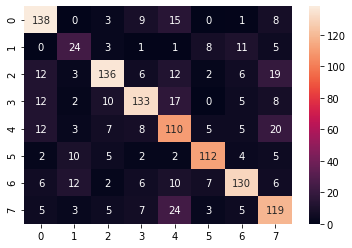

In [19]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')


In [20]:
u=dtree.predict(xtest.iloc[127,:].to_frame().transpose())
print(u)

[3]


In [21]:
ytest.iloc[127]

Emotion    3
Name: 3370, dtype: int32

## KNN classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=2)

In [24]:
inpu=xtrain
out=ytrain["Emotion"]
out=np.array(out)
ou=ytest["Emotion"]
knn.fit(inpu,out)

KNeighborsClassifier(n_neighbors=2)

In [25]:
pred = knn.predict(xtest)
pred

array([1, 6, 7, ..., 0, 4, 5])

## Evaluating model

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
accuracy_score(ou,pred)*100

80.18867924528303

<AxesSubplot:>

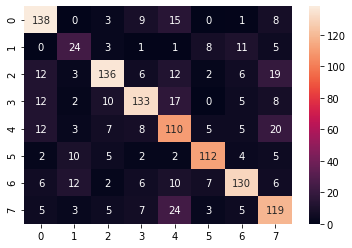

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')


In [30]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       174
           1       0.42      0.45      0.44        53
           2       0.80      0.69      0.74       196
           3       0.77      0.71      0.74       187
           4       0.58      0.65      0.61       170
           5       0.82      0.79      0.80       142
           6       0.78      0.73      0.75       179
           7       0.63      0.70      0.66       171

    accuracy                           0.71      1272
   macro avg       0.69      0.69      0.69      1272
weighted avg       0.72      0.71      0.71      1272



MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)